In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
np.random.seed(42)

Get Data, and Define save_fig function

In [3]:
tarPath = '/Users/titus/tcfst_class/tcfst_course/traffic-accident-project/'\
            'tc-project/idef1_data_set警政署/idef1_data.csv'
df1 = pd.read_csv(tarPath)

tarPath = '/Users/titus/tcfst_class/tcfst_course/traffic-accident-project/'\
            'tc-project/idef2_data_set保險業者/idef2_data.csv'
df2 = pd.read_csv(tarPath)

Quick Look

In [83]:
df1.isnull().sum()

發生日期                     0
發生時間                     0
事故類別名稱                   0
道路類別-第1當事者-名稱            0
速限-第1當事者                 0
道路型態大類別名稱                0
道路型態子類別名稱                0
事故位置大類別名稱                0
事故位置子類別名稱                0
道路障礙-視距名稱                0
事故類型及型態大類別名稱             0
事故類型及型態子類別名稱             0
當事者區分-類別-大類別名稱-車種    89765
當事者區分-類別-子類別名稱-車種    89868
當事者事故發生時年齡               0
當事者屬-性-別名稱               0
保護裝備名稱               83826
當事者行動狀態大類別名稱         83785
當事者行動狀態子類別名稱         83786
車輛撞擊部位大類別名稱-最初       85226
車輛撞擊部位子類別名稱-最初       85226
肇因研判子類別名稱-個別           143
經度                       0
緯度                       0
五百公尺內有無照相機               0
死亡人數                     0
受傷人數                     0
dtype: int64

In [4]:
list(df1.columns)

['發生日期',
 '發生時間',
 '事故類別名稱',
 '道路類別-第1當事者-名稱',
 '速限-第1當事者',
 '道路型態大類別名稱',
 '道路型態子類別名稱',
 '事故位置大類別名稱',
 '事故位置子類別名稱',
 '道路障礙-視距名稱',
 '事故類型及型態大類別名稱',
 '事故類型及型態子類別名稱',
 '當事者區分-類別-大類別名稱-車種',
 '當事者區分-類別-子類別名稱-車種',
 '當事者事故發生時年齡',
 '當事者屬-性-別名稱',
 '保護裝備名稱',
 '當事者行動狀態大類別名稱',
 '當事者行動狀態子類別名稱',
 '車輛撞擊部位大類別名稱-最初',
 '車輛撞擊部位子類別名稱-最初',
 '肇因研判子類別名稱-個別',
 '經度',
 '緯度',
 '五百公尺內有無照相機',
 '死亡人數',
 '受傷人數']

In [5]:
list(df2.columns)

['發生日期',
 '發生時間',
 '事故類別名稱',
 '天候名稱',
 '光線名稱',
 '道路類別-第1當事者-名稱',
 '速限-第1當事者',
 '道路型態大類別名稱',
 '路面狀況-路面鋪裝名稱',
 '路面狀況-路面狀態名稱',
 '路面狀況-路面缺陷名稱',
 '道路障礙-視距名稱',
 '號誌-號誌動作名稱',
 '車道劃分設施-分向設施大類別名稱',
 '車道劃分設施-分向設施子類別名稱',
 '車道劃分設施-分道設施-快車道或一般車道間名稱',
 '車道劃分設施-分道設施-快慢車道間名稱',
 '車道劃分設施-分道設施-路面邊線名稱',
 '事故類型及型態大類別名稱',
 '肇因研判大類別名稱-主要',
 '肇因研判子類別名稱-主要',
 '當事者區分-類別-大類別名稱-車種[小客車]',
 '當事者區分-類別-大類別名稱-車種[機車]',
 '當事者區分-類別-大類別名稱-車種[人]',
 '當事者區分-類別-大類別名稱-車種[軍車]',
 '當事者區分-類別-大類別名稱-車種[小貨車(含客、貨兩用)]',
 '當事者區分-類別-大類別名稱-車種[慢車]',
 '當事者區分-類別-大類別名稱-車種[大貨車]',
 '當事者區分-類別-大類別名稱-車種[大客車]',
 '當事者區分-類別-大類別名稱-車種[特種車]',
 '當事者區分-類別-大類別名稱-車種[曳引車]',
 '當事者區分-類別-大類別名稱-車種[其他車]',
 '當事者區分-類別-大類別名稱-車種[半聯結車]',
 '當事者區分-類別-大類別名稱-車種[全聯結車]',
 '當事者屬-性-別名稱[女]',
 '當事者屬-性-別名稱[男]',
 '當事者屬-性-別名稱[無或物(動物、堆置物)]',
 '當事者屬-性-別名稱[肇事逃逸尚未查獲]',
 '死亡人數',
 '受傷人數',
 '當事者事故發生時年齡[小於18]',
 '當事者事故發生時年齡[介於18~24]',
 '當事者事故發生時年齡[介於25~39]',
 '當事者事故發生時年齡[介於40~59]',
 '當事者事故發生時年齡[介於60~110]',
 '保護裝備名稱[戴安全帽或繫安全帶(使用幼童安全椅)]',
 '保護裝備名稱[不明]',
 '保護裝備名稱[未戴案全帽或未繫安全帶(未使用幼童安全椅)]',
 '保

In [8]:
df1['速限-第1當事者'].unique()

array([ 50.,  30.,  60.,  40.,  80.,  70., 100.,  15.,   0.,  25.,  10.,
        90., 110.,  20.,   1., 450.,   5.,  35.,  45.,  65.,  29.,   2.,
        16.,   3.,   4.,   7.,  52., 401.,  54., 580., 501.,  55.,   6.,
        28., 550.,   8., 500., 410.,  51.,  42.,  47., 400.,  41.,  75.,
       510., 505.,  61.,  22.,  18., 150., 201.,  95.,  58., 850.,  14.,
       103.,  62.,  59.,  48.,  44.,  17., 506., 310.,  56., 440., 601.,
         9., 600.,  12., 300., 502., 504.,  33.,  43., 620.,  11.,  77.,
       140., 540.,  39.,  69., 200.,  57., 404., 301.,  99., 420.,  36.,
       606.])

In [84]:
sorted(dict(df1['速限-第1當事者'].value_counts()))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 22.0,
 25.0,
 28.0,
 29.0,
 30.0,
 33.0,
 35.0,
 36.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 47.0,
 48.0,
 50.0,
 51.0,
 52.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 65.0,
 69.0,
 70.0,
 75.0,
 77.0,
 80.0,
 90.0,
 95.0,
 99.0,
 100.0,
 103.0,
 110.0,
 140.0,
 150.0,
 200.0,
 201.0,
 300.0,
 301.0,
 310.0,
 400.0,
 401.0,
 404.0,
 410.0,
 420.0,
 440.0,
 450.0,
 500.0,
 501.0,
 502.0,
 504.0,
 505.0,
 506.0,
 510.0,
 540.0,
 550.0,
 580.0,
 600.0,
 601.0,
 606.0,
 620.0,
 850.0]

In [78]:
df1[(df1['速限-第1當事者'] == 0)]

,發生日期,發生時間,事故類別名稱,道路類別-第1當事者-名稱,速限-第1當事者,道路型態大類別名稱,道路型態子類別名稱,事故位置大類別名稱,事故位置子類別名稱,道路障礙-視距名稱,...,當事者行動狀態大類別名稱,當事者行動狀態子類別名稱,車輛撞擊部位大類別名稱-最初,車輛撞擊部位子類別名稱-最初,肇因研判子類別名稱-個別,經度,緯度,五百公尺內有無照相機,死亡人數,受傷人數
589,20200101.0,95433.0,A2,其他,0.0,圓環廣場,廣場,其他,其他,良好,...,車的狀態,向前直行中,汽車,前車頭,未注意車前狀態,121.654090,24.665366,False,0,1
590,20200101.0,95433.0,A2,其他,0.0,圓環廣場,廣場,其他,其他,良好,...,NaN,NaN,NaN,NaN,尚未發現肇事因素,121.654090,24.665366,False,0,1
1760,20200101.0,200000.0,A2,市區道路,0.0,交岔路,四岔路,交叉路口,交叉路口內,良好,...,車的狀態,左轉彎,機車,左側車身,左轉彎未依規定,121.545972,24.986723,False,0,3
1761,20200101.0,200000.0,A2,市區道路,0.0,交岔路,四岔路,交叉路口,交叉路口內,良好,...,人的狀態,不明,機車,右側車身,尚未發現肇事因素,121.545972,24.986723,False,0,3
1762,20200101.0,200000.0,A2,市區道路,0.0,交岔路,四岔路,交叉路口,交叉路口內,良好,...,人的狀態,不明,其他,非汽(機)車,尚未發現肇事因素,121.545972,24.986723,False,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616490,20211231.0,175000.0,A2,其他,0.0,單路部分,其他,其他,其他,良好,...,車的狀態,超車(含超越),其他,非汽(機)車,違規超車,121.465493,25.115181,False,0,2
1616491,20211231.0,175000.0,A2,其他,0.0,單路部分,其他,其他,其他,良好,...,車的狀態,向前直行中,其他,非汽(機)車,尚未發現肇事因素,121.465493,25.115181,False,0,2
1616912,20211231.0,211522.0,A2,市區道路,0.0,單路部分,直路,路段,一般車道(未劃分快慢車道),良好,...,車的狀態,左轉彎,汽車,左前車頭(身),未依規定讓車,121.257196,24.956944,False,0,1
1616913,20211231.0,211522.0,A2,市區道路,0.0,單路部分,直路,路段,一般車道(未劃分快慢車道),良好,...,車的狀態,向前直行中,機車,前車頭,其他引起事故之違規或不當行為,121.257196,24.956944,False,0,1


In [89]:
df1[(df1['速限-第1當事者'] < 10 ) & (df1['死亡人數'] > 0)]

,發生日期,發生時間,事故類別名稱,道路類別-第1當事者-名稱,速限-第1當事者,道路型態大類別名稱,道路型態子類別名稱,事故位置大類別名稱,事故位置子類別名稱,道路障礙-視距名稱,...,當事者行動狀態大類別名稱,當事者行動狀態子類別名稱,車輛撞擊部位大類別名稱-最初,車輛撞擊部位子類別名稱-最初,肇因研判子類別名稱-個別,經度,緯度,五百公尺內有無照相機,死亡人數,受傷人數
812887,20200108.0,224300.0,A1,市區道路,5.0,交岔路,三岔路,交叉路口,交叉路口內,良好,...,車的狀態,向前直行中,汽車,前車頭,未依規定減速,120.281427,22.72764,False,1,1
812888,20200108.0,224300.0,A1,市區道路,5.0,交岔路,三岔路,交叉路口,交叉路口內,良好,...,車的狀態,左轉彎,其他,非汽(機)車,左轉彎未依規定,120.281427,22.72764,False,1,1


In [87]:
df1[df1['速限-第1當事者'] > 600][['速限-第1當事者','肇因研判子類別名稱-個別','受傷人數', '死亡人數']]

,速限-第1當事者,肇因研判子類別名稱-個別,受傷人數,死亡人數
434669,850.0,未保持行車安全間隔,1,0
434670,850.0,尚未發現肇事因素,1,0
705317,601.0,違反特定標誌(線)禁制,1,0
705318,601.0,未保持行車安全距離,1,0
936795,620.0,未依規定讓車,1,0
936796,620.0,未注意車前狀態,1,0
1112977,601.0,未注意車前狀態,1,0
1112978,601.0,未保持行車安全間隔,1,0
1603471,606.0,不明原因肇事,1,0
1603472,606.0,尚未發現肇事因素,1,0


In [72]:
df1[(df1['速限-第1當事者'] > 150) &(df1['事故位置子類別名稱'] == "路肩、路緣") ][['事故位置子類別名稱','速限-第1當事者','肇因研判子類別名稱-個別','受傷人數', '死亡人數']]

,事故位置子類別名稱,速限-第1當事者,肇因研判子類別名稱-個別,受傷人數,死亡人數
440797,路肩、路緣,500.0,未注意車前狀態,1,0
440798,路肩、路緣,500.0,尚未發現肇事因素,1,0
626838,路肩、路緣,505.0,未注意車前狀態,2,0
626839,路肩、路緣,505.0,尚未發現肇事因素,2,0
626840,路肩、路緣,505.0,尚未發現肇事因素,2,0


In [74]:
df1[(df1['速限-第1當事者'] > 150) &(df1['事故位置子類別名稱'] == "慢車道") ][['事故位置子類別名稱','速限-第1當事者','肇因研判子類別名稱-個別','受傷人數', '死亡人數']]

,事故位置子類別名稱,速限-第1當事者,肇因研判子類別名稱-個別,受傷人數,死亡人數
630473,慢車道,440.0,其他引起事故之違規或不當行為,1,0
630474,慢車道,440.0,尚未發現肇事因素,1,0
705317,慢車道,601.0,違反特定標誌(線)禁制,1,0
705318,慢車道,601.0,未保持行車安全距離,1,0
1436706,慢車道,420.0,違反特定標誌(線)禁制,1,0
1436707,慢車道,420.0,尚未發現肇事因素,1,0
1600204,慢車道,510.0,起步未注意其他車(人)安全,1,0
1600205,慢車道,510.0,尚未發現肇事因素,1,0
1603471,慢車道,606.0,不明原因肇事,1,0
1603472,慢車道,606.0,尚未發現肇事因素,1,0


In [101]:
len(df1[(df1['速限-第1當事者'] >= 130 )])/len(df1['速限-第1當事者'])*100

0.008756151659013256

# **敘述統計**

In [96]:
len(df1)

1621717

In [15]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','25%分位數',
                    '中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [36]:
#['購買與否','性別','世代','區域','上網次數','每天平均上網時間','轉換率']
cols=['發生日期',
'發生時間',
'速限-第1當事者']
Descriptivestatistics= pd.DataFrame(df[cols].apply(status))
Descriptivestatistics

,發生日期,發生時間,速限-第1當事者
總數,7.205410e+05,7.205410e+05,720541.000000
最小值,2.020010e+07,0.000000e+00,0.000000
最小值位置,0.000000e+00,3.190000e+03,241.000000
25%分位數,2.020071e+07,9.280000e+04,40.000000
中位數,2.020123e+07,1.347530e+05,50.000000
75%分位數,2.021070e+07,1.745310e+05,50.000000
均值,2.020565e+07,1.352628e+05,46.652930
最大值,2.021123e+07,2.359590e+05,110.000000
最大值位數,7.177980e+05,7.019960e+05,824.000000
平均絕對偏差,4.995065e+03,4.314464e+04,6.949344


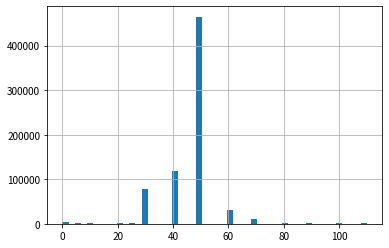

In [22]:
df["速限-第1當事者"].hist(bins=50)
plt.show()

In [42]:
indexNames = df[ df['速限-第1當事者'] > 120 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
indexNames = df[ df['速限-第1當事者'] <= 0 ].index
df.drop(indexNames , inplace=True)

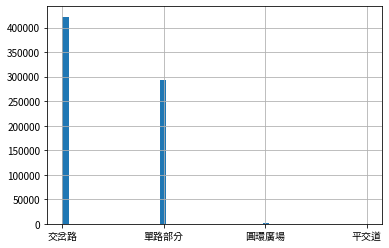

In [57]:
df["道路型態大類別名稱"].hist(bins=50)
plt.show()

In [31]:
df['道路型態大類別名稱'].value_counts()/len(df['道路型態大類別名稱'])*100

交岔路     58.833571
單路部分    40.918143
圓環廣場     0.238987
平交道      0.009299
Name: 道路型態大類別名稱, dtype: float64

交岔路     0.579885
單路部分    0.417692
圓環廣場    0.002329
平交道     0.000093
Name: 道路型態大類別名稱, dtype: float64


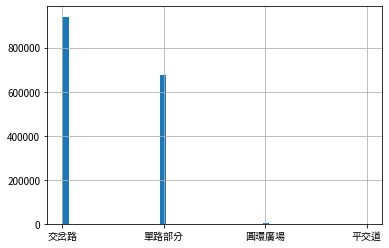

In [79]:
print(df1['道路型態大類別名稱'].value_counts()/df1['道路型態大類別名稱'].value_counts().sum())
df1["道路型態大類別名稱"].hist(bins=50)
plt.show()

直路        0.363294
四岔路       0.329200
三岔路       0.212885
多岔路       0.037800
彎曲路及附近    0.028208
其他        0.011559
橋樑        0.005001
巷弄        0.002810
坡路        0.002685
高架道路      0.002312
圓環        0.002119
地下道       0.000784
隧道        0.000675
涵洞        0.000364
廣場        0.000210
有遮斷器      0.000080
無遮斷器      0.000013
Name: 道路型態子類別名稱, dtype: float64


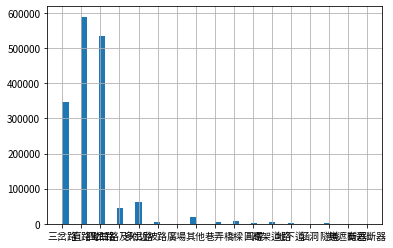

In [80]:
print(df1['道路型態子類別名稱'].value_counts()/df1['道路型態子類別名稱'].value_counts().sum())
df1["道路型態子類別名稱"].hist(bins=50)
plt.show()

{'尚未發現肇事因素': 494980, '未注意車前狀態': 329968, '未依規定讓車': 155357, '不明原因肇事': 80655, '未依規定減速': 65682, '其他引起事故之違規或不當行為': 57150, '未保持行車安全距離': 50748, '左轉彎未依規定': 50071, '違反號誌管制或指揮': 39972, '未保持行車安全間隔': 35687, '違反特定標誌(線)禁制': 29198, '右轉彎未依規定': 29077, '起步未注意其他車(人)安全': 27442, '變換車道或方向不當': 26614, '迴轉未依規定': 18581, '違規停車或暫停不當而肇事': 15804, '超速失控': 10402, '逆向行駛': 9317, '酒醉(後)駕駛失控': 9213, '其他引起事故之疏失或行為': 8479, '未靠右行駛': 7064, '未依規定行走行人穿越道、地下道、天橋而穿越道路': 6817, '違規超車': 6482, '倒車未依規定': 6386, '動物竄出': 5771, '開啟車門不當而肇事': 5488, '橫越道路不慎': 5472, '搶越行人穿越道': 5152, '穿越道路未注意左右來車': 4678, '疲勞(患病)駕駛失控': 3836, '未依規定使用燈光': 2436, '路況危險無安全(警告)設施': 2330, '未依標誌、標線、號誌或手勢指揮穿越道路': 2283, '爭(搶)道行駛': 2018, '停車操作時，未注意其他車(人)安全': 1382, '蛇行、方向不定': 1186, '其他交通管制不當': 949, '其他引起事故之故障': 894, '上下車輛未注意安全': 887, '裝載貨物不穩妥': 780, '煞車失靈': 630, '車輪脫落或輪胎爆裂': 587, '在道路上嬉戲或奔走不定': 548, '其他裝載不當肇事': 483, '乘坐不當而跌落': 335, '裝載未盡安全措施': 272, '使用手持行動電話失控': 265, '夜間行駛無燈光設備': 217, '在路上工作未設適當標識': 178, '貨物超長、寬、高而肇事': 176, '裝卸貨物不當': 147, '交通管制設施失靈或損毀': 143, '拋錨未採安全措施': 1

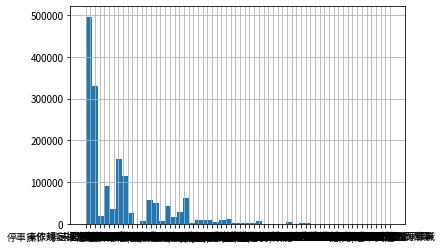

In [90]:
print(dict(df1['肇因研判子類別名稱-個別'].value_counts()))
print(df1['肇因研判子類別名稱-個別'].unique())
df1["肇因研判子類別名稱-個別"].hist(bins=50)
plt.show()

In [92]:
df['道路類別-第1當事者-名稱'].unique()

array(['市區道路', '其他', '村里道路', '省道', '專用道路', '縣道', '鄉道', '國道'], dtype=object)